In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from kerastuner.tuners import RandomSearch, Hyperband

In [56]:
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# Models 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [57]:
# Hyperparameter
from tensorflow import keras
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch, Hyperband
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Flatten,Dropout

In [58]:
print(tf.__version__)

2.4.0


In [59]:
%config IPCompleter.greedy=True
%matplotlib inline

In [60]:
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (20, 5),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}
pylab.rcParams.update(params)

In [61]:
df = pd.read_csv("../dataset/survey.csv")
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [63]:
# Clean all null values.
df.state.fillna("", inplace=True)
df.work_interfere.fillna(df.work_interfere.mode()[0], inplace=True)
df.self_employed.fillna(df.self_employed.mode()[0], inplace=True)
df.comments.fillna("None", inplace=True)
print(df.isnull().sum())

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64


In [64]:
# Combine country and state
df["Country"].where(
    df["state"] == "", other=df["Country"] + ", " + df["state"], inplace=True
)
df.drop("state", axis=1, inplace=True)
df.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,"United States, IL",No,No,Yes,Often,6-25,No,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,None
1,2014-08-27 11:29:37,44,M,"United States, IN",No,No,No,Rarely,More than 1000,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,None
2,2014-08-27 11:29:44,32,Male,Canada,No,No,No,Rarely,6-25,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,None
3,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,None
4,2014-08-27 11:30:22,31,Male,"United States, TX",No,No,No,Never,100-500,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,None


In [65]:
df.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female                                              2
Female (trans)                                      2
Mail                                                1
fluid                                               1
Cis Man                                             1
something kinda male?       

In [66]:
# Clean gender's and make them either Male, Female, Non-binary

df["Gender"].replace(
    [
        "A little about you",
        "Agender",
        "All",
        "Androgyne",
        "Enby",
        "non-binary",
        "Nah",
        "something kinda male?",
        "p",
        "ostensibly male, unsure what that really means",
        "Genderqueer",
        "queer/she/they",
        "Neuter",
        "Trans woman",
        "Trans-female",
        "queer",
        "fluid",
        "fluid",
        "male leaning androgynous",
        "Female (trans)",
        "Guy (-ish) ^_^",
    ],
    "Nonbinary",
    inplace=True,
)


df["Gender"].replace(
    [
        "Cis Female",
        "F",
        "Femake",
        "Female ",
        "Female (cis)",
        "Woman",
        "femail",
        "female",
        "woman",
        "cis-female/femme",
        "f",
    ],
    "Female",
    inplace=True,
)

df["Gender"].replace(
    [
        "Cis Male",
        "Cis Man",
        "M",
        "Mail",
        "Make",
        "Mal",
        "Male ",
        "Male (CIS)",
        "Male-ish",
        "Man",
        "m",
        "cis male",
        "maile",
        "male",
        "msle",
        "Malr",
    ],
    "Male",
    inplace=True,
)
df.Gender.value_counts()

Male         991
Female       247
Nonbinary     21
Name: Gender, dtype: int64

In [67]:
# Not normalized data
df.Age.describe()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64

In [68]:
def filterByAge(age):
    indeces_list = df.index[df["Age"] == age].tolist()
    return df.loc[indeces_list]


filterByAge(5)

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
734,2014-08-28 10:35:55,5,Male,"United States, OH",No,No,No,Sometimes,100-500,No,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...


In [69]:
# Remove any age outliers above the age 100.
df["Age"] = df["Age"].abs()
assert len(df[df["Age"] < 0]) == 0
indeces_list = df.index[df["Age"] > 100].tolist()
df = df.drop(indeces_list)
df.Age.describe()

count    1256.000000
mean       31.992038
std         7.421403
min         1.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

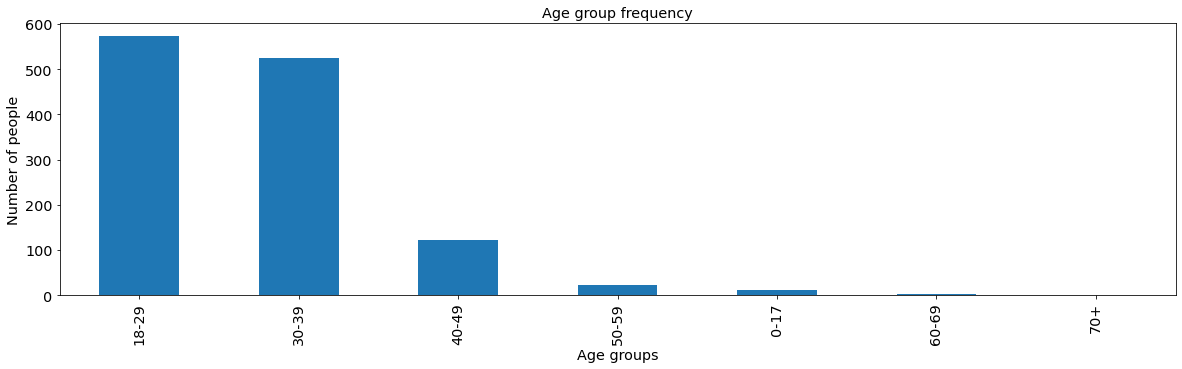

In [70]:
bins = [0, 18, 30, 40, 50, 60, 70, np.inf]
labels = ["0-17", "18-29", "30-39", "40-49", "50-59", "60-69", "70+"]
df["agerange"] = pd.cut(df.Age, bins, labels=labels, include_lowest=True)
df.agerange.value_counts().plot(kind="bar")
plt.xlabel("Age groups")
plt.ylabel("Number of people")
plt.title("Age group frequency")
plt.show()

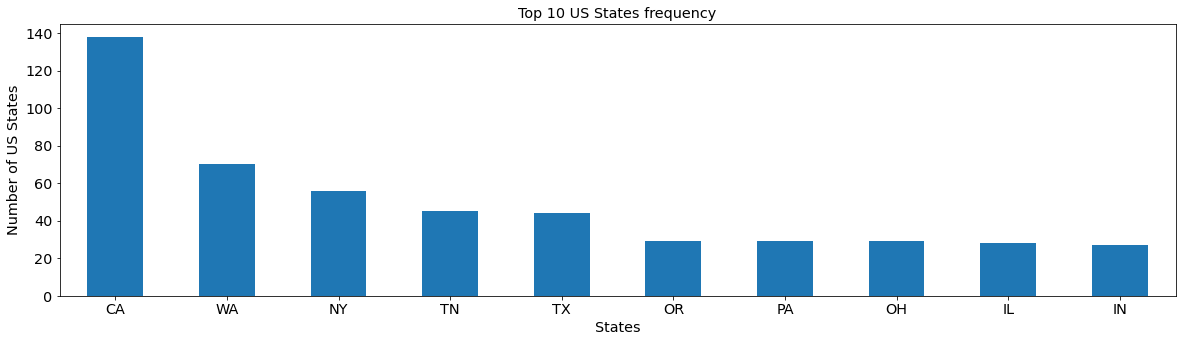

In [71]:
# Only United States
df_only_us = df.where(df["Country"].str.contains("United States")).dropna(axis=0)
df_only_us["Country"] = df["Country"].str.replace("United States, ", "")
df_only_us.Country.value_counts()[:10].plot(kind="bar")
plt.xticks(rotation=360)
plt.xlabel("States")
plt.ylabel("Number of US States")
plt.title("Top 10 US States frequency")
plt.show()

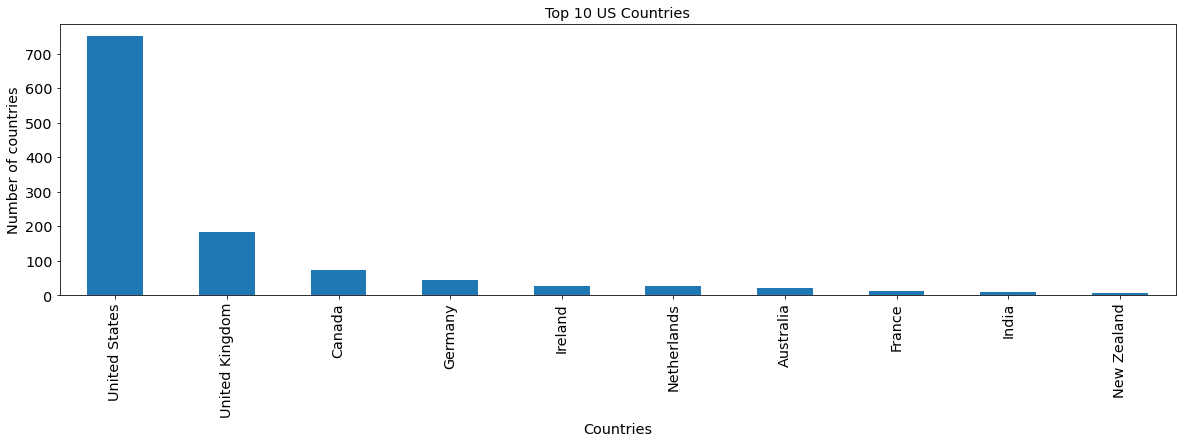

In [72]:
# All Countires
df_global = df.copy()
df_global["Country"] = df.Country.str.replace(r"(^.*United States.*$)", "United States")
df_global.Country.value_counts()[:10].plot(kind="bar")
plt.xlabel("Countries")
plt.ylabel("Number of countries")
plt.title("Top 10 US Countries")
plt.show()

In [73]:
df.drop("Timestamp", axis=1, inplace=True)
df.drop("agerange", axis=1, inplace=True)
df.drop("comments", axis=1, inplace=True)

In [74]:
for column in list(df.columns.values):
    print(column, list(df[column].unique()))

Age [37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40, 38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48, 20, 57, 58, 47, 62, 51, 65, 49, 5, 53, 61, 8, 11, 1, 72]
Gender ['Female', 'Male', 'Nonbinary']
Country ['United States, IL', 'United States, IN', 'Canada', 'United Kingdom', 'United States, TX', 'United States, TN', 'United States, MI', 'United States, OH', 'Bulgaria', 'United States, CA', 'United States, CT', 'United States, MD', 'France', 'United States, NY', 'United States, NC', 'United States, MA', 'United States, IA', 'United States, PA', 'United States, WA', 'United States, WI', 'Portugal', 'Netherlands', 'United States, UT', 'United States', 'Switzerland', 'Poland', 'Australia', 'United States, NM', 'Germany', 'United States, OR', 'United States, FL', 'Russia', 'United States, MN', 'United States, MO', 'Mexico', 'United States, AZ', 'Brazil', 'United States, CO', 'United States, GA', 'United States, DC', 'Slovenia', 'United States, NE', 'C

In [75]:
# One hot encoding
hot_encoding_features = [
    "self_employed",
    "family_history",
    "work_interfere",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_vs_physical",
    "mental_health_interview",
    "phys_health_interview",
    "obs_consequence",
    "Gender",
]
for feature in hot_encoding_features:
    encoder = OneHotEncoder(handle_unknown="error")
    data_encoded = encoder.fit_transform(df[[feature]])
    for index, unique_feature_data in enumerate(df[feature].unique()):
        unique_feature_data = unique_feature_data.lower().replace(" ", "_")
        col_name = feature + "_" + unique_feature_data
        data_encoded_array = data_encoded.toarray()
        df[col_name] = data_encoded_array[:, index]
    df.drop(feature, axis=1, inplace=True)
df.head()

,Age,Country,treatment,no_employees,self_employed_no,self_employed_yes,family_history_no,family_history_yes,work_interfere_often,work_interfere_rarely,...,mental_health_interview_yes,mental_health_interview_maybe,phys_health_interview_maybe,phys_health_interview_no,phys_health_interview_yes,obs_consequence_no,obs_consequence_yes,Gender_female,Gender_male,Gender_nonbinary
0,37,"United States, IL",Yes,6-25,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,44,"United States, IN",No,More than 1000,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,Canada,No,6-25,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,31,United Kingdom,Yes,26-100,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31,"United States, TX",No,100-500,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


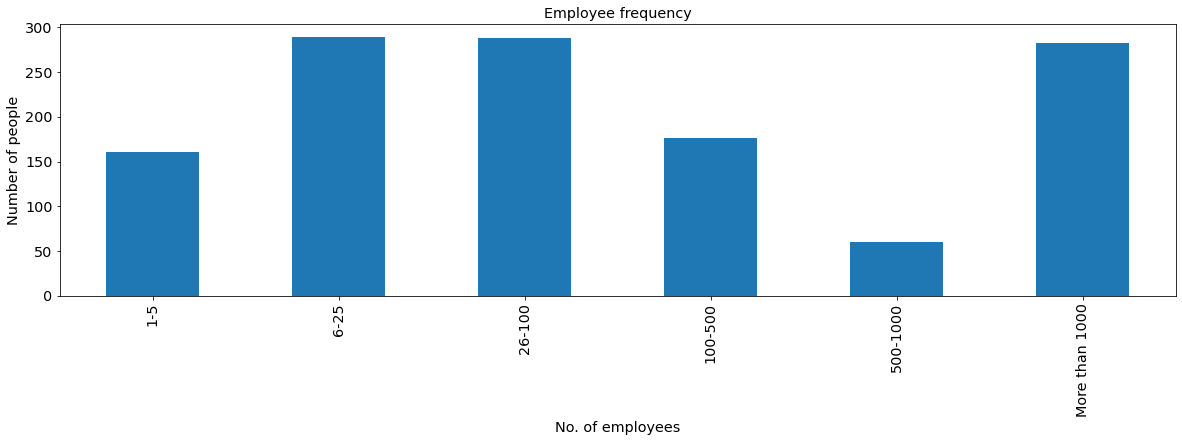

In [76]:
no_emp_order = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]
df.no_employees.value_counts().loc[no_emp_order].plot(kind="bar")
plt.xlabel("No. of employees")
plt.ylabel("Number of people")
plt.title("Employee frequency")
plt.show()

In [77]:
# Ordinal encoding.
ordinal_features = ["Country", "no_employees"]
ordinal_enconder = OrdinalEncoder()
for features in ordinal_features:
    OrdFeaturesToNum = ordinal_enconder.fit_transform(df[[features]])
    df[features] = OrdFeaturesToNum
df.head()

,Age,Country,treatment,no_employees,self_employed_no,self_employed_yes,family_history_no,family_history_yes,work_interfere_often,work_interfere_rarely,...,mental_health_interview_yes,mental_health_interview_maybe,phys_health_interview_maybe,phys_health_interview_no,phys_health_interview_yes,obs_consequence_no,obs_consequence_yes,Gender_female,Gender_male,Gender_nonbinary
0,37,58.0,Yes,4.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,44,59.0,No,5.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,8.0,No,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,31,46.0,Yes,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31,85.0,No,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [78]:
df.treatment.replace(("Yes", "No"), (1, 0), inplace=True)
df.head()

,Age,Country,treatment,no_employees,self_employed_no,self_employed_yes,family_history_no,family_history_yes,work_interfere_often,work_interfere_rarely,...,mental_health_interview_yes,mental_health_interview_maybe,phys_health_interview_maybe,phys_health_interview_no,phys_health_interview_yes,obs_consequence_no,obs_consequence_yes,Gender_female,Gender_male,Gender_nonbinary
0,37,58.0,1,4.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,44,59.0,0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,32,8.0,0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,31,46.0,1,2.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,31,85.0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

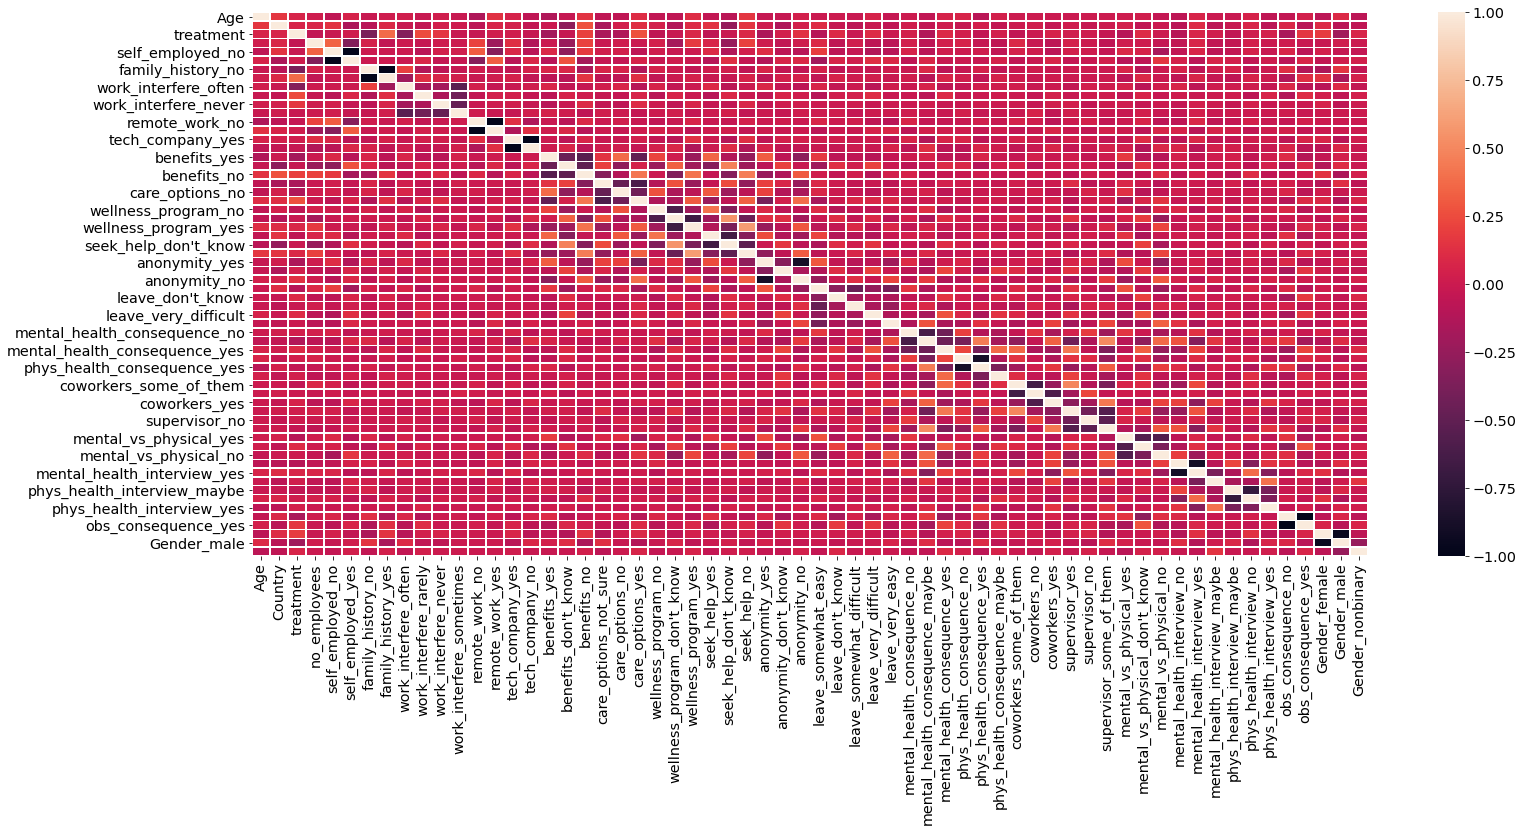

In [79]:
corr_matrix = df.corr(method="spearman")
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, linewidths=0.5)

In [80]:
# Split data for training
features = df.drop("treatment", axis=1)
labels = df["treatment"]

train_ratio = 0.80
validation_ratio = 0.15
test_ratio = 0.05

x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=1 - train_ratio, random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(
    x_test,
    y_test,
    test_size=test_ratio / (test_ratio + validation_ratio),
    random_state=42,
)

In [81]:
# Stochastic Gradient Descent (SGD) classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)


SGDClassifier(random_state=42)

In [82]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.69850746, 0.71044776, 0.54191617])

In [83]:

class MentalHealthTunerHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = keras.Sequential()
        model.add(Flatten(input_shape=(self.input_shape,)))
        model.add(
            Dropout(
                rate=hp.Float(
                    "dropout", min_value=0, max_value=0.9, default=0.1, step=0.01
                )
            )
        )
        model.add(
            Dense(
                hp.Int("units", min_value=32, max_value=1024, step=32, default=128),
                activation=hp.Choice(
                    "dense_activation",
                    values=["relu", "tanh", "sigmoid"],
                    default="relu",
                ),
            )
        )
        model.add(
            Dropout(
                rate=hp.Float(
                    "dropout", min_value=0, max_value=0.9, default=0.1, step=0.01
                )
            )
        )
        model.add(
            Dense(
                hp.Int("units", min_value=32, max_value=1024, step=32, default=128),
                activation=hp.Choice(
                    "dense_activation",
                    values=["relu", "tanh", "sigmoid"],
                    default="relu",
                ),
            )
        )
        model.add(Dense(1, activation="sigmoid"))

        model.compile(
            loss="binary_crossentropy",
            optimizer=keras.optimizers.Adam(
                hp.Float(
                    "learning_rate",
                    min_value=1e-4,
                    max_value=1e-1,
                    sampling="LOG",
                    default=1e-3,
                )
            ),
            metrics=["accuracy"],
        )
        return model
print("done")

done


In [84]:
# Neural Network Topology and Tuning.
input_features=x_train.shape[1]
model_tuner = MentalHealthTunerHyperModel(input_features)


def activateTuner(space_type):
    tuner = None
    epochs = 40
    MAX_TRIALS = 20
    EXEC_TRIALS = 2
    if space_type == "random":
        # Random Space Tuner
        tuner = RandomSearch(
            model_tuner,
            objective="val_accuracy",
            max_trials=MAX_TRIALS,
            executions_per_trial=EXEC_TRIALS,
            project_name="../hyperparameters",
        )
    elif space_type == "hyper":
        tuner = Hyperband(
            model_tuner,
            objective="val_accuracy",
            max_epochs=epochs,
            executions_per_trial=EXEC_TRIALS,
            project_name="../hyperparameters_hyperband",
        )
    tuner.search(
        x_train,
        y_train,
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)],
    )
    # Get the optimal hyperparameters

    # Retrieve the best model.
    best_model = tuner.get_best_models(num_models=1)[0]

    # Save the best model.
    best_model.save(f"../models/tuned_mental_health_{space_type}.h5")
    print(best_model.summary())
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(
        f"""
    The random hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
    is {best_hps.get('learning_rate')}.
    """
    )
    return tuner.results_summary()


activateTuner("random")

INFO:tensorflow:Reloading Oracle from existing project ./../hyperparameters/oracle.json
INFO:tensorflow:Reloading Tuner from ./../hyperparameters/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 61)                0         
_________________________________________________________________
dropout (Dropout)            (None, 61)                0         
_________________________________________________________________
dense (Dense)                (None, 416)               25792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               173472    
__________________________________________________________

In [85]:
activateTuner("hyper")

INFO:tensorflow:Reloading Oracle from existing project ./../hyperparameters_hyperband/oracle.json
INFO:tensorflow:Reloading Tuner from ./../hyperparameters_hyperband/tuner0.json
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 61)                0         
_________________________________________________________________
dropout (Dropout)            (None, 61)                0         
_________________________________________________________________
dense (Dense)                (None, 992)               61504     
_________________________________________________________________
dropout_1 (Dropout)          (None, 992)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 992)               985056    
______________________________________

In [86]:
random_search_best_model = keras.models.load_model('../models/tuned_mental_health_random.h5')
random_search_best_model.summary()
keras.utils.plot_model(
    random_search_best_model,
    to_file="random_space_model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 61)                0         
_________________________________________________________________
dropout (Dropout)            (None, 61)                0         
_________________________________________________________________
dense (Dense)                (None, 416)               25792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 416)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               173472    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 199,681
Trainable params: 199,681
Non-trainable params: 0
__________________________________________________

In [105]:
loss, accuracy = random_search_best_model.evaluate(x_test,y_test)
print("Random Search Model Accuracy on Test set:", accuracy * 100, "%")

2/2 [==============================] - 0s 2ms/step - loss: 0.4552 - accuracy: 0.8254
Random Search Model Accuracy on Test set: 82.53968358039856 %


In [88]:
hyperband_best_model = keras.models.load_model('../models/tuned_mental_health_hyper.h5')

In [89]:
loss, accuracy = hyperband_best_model.evaluate(x_test,y_test)
print("Hyperband Search Model Accuracy on Test set:", accuracy * 100, "%")

2/2 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.7937
Hyperband Search Model Accuracy on Test set: 79.36508059501648 %


In [90]:
# Try multiple algorithm
def fit_ml_algo(algo, cv):
    
    # Building the model
    model = algo.fit(x_train,y_train)
    
    # Training Accuracy
    train_acc = round(model.score(x_train,y_train)*100,2)
    
    # Cross Validation Accuracy
    cv_pred = cross_val_predict(model,x_train,y_train,cv=cv,n_jobs=-1)
    cv_acc = round(accuracy_score(y_train,cv_pred)*100,2)
    
    # Returning all needed fields
    return train_acc, cv_acc

In [91]:
knn_train_acc, knn_train_cv = fit_ml_algo(KNeighborsClassifier(),5)
print('Training Accuracy: ',knn_train_acc,'%')
print('5 fold CV Accuracy: ',knn_train_cv,'%')

Training Accuracy:  74.2 %
5 fold CV Accuracy:  57.17 %


In [94]:
train_acc_sgd,cv_acc_sgd = fit_ml_algo(SGDClassifier(random_state=42),5)

print('Training Accuracy: ',train_acc_sgd,'%')
print('5 fold CV Accuracy: ',cv_acc_sgd,'%')

Training Accuracy:  58.37 %
5 fold CV Accuracy:  65.94 %


In [96]:
train_acc_log,cv_acc_log = fit_ml_algo(LogisticRegression(random_state=42),5)

print('Training Accuracy: ',train_acc_log,'%')
print('5 fold CV Accuracy: ',cv_acc_log,'%')

/Users/user/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy:  77.09 %
5 fold CV Accuracy:  74.6 %


In [97]:
train_acc_svc,cv_acc_svc = fit_ml_algo(SVC(kernel='linear',random_state=42),5)

print('Training Accuracy: ',train_acc_svc,'%')
print('5 fold CV Accuracy: ',cv_acc_svc,'%')

Training Accuracy:  77.79 %
5 fold CV Accuracy:  74.2 %


In [98]:
train_acc_svc,cv_acc_svc = fit_ml_algo(SVC(kernel='rbf',random_state=42),5)

print('Training Accuracy: ',train_acc_svc,'%')
print('5 fold CV Accuracy: ',cv_acc_svc,'%')

Training Accuracy:  55.68 %
5 fold CV Accuracy:  54.78 %


In [99]:
train_acc_svc,cv_acc_svc = fit_ml_algo(SVC(kernel='poly',random_state=42),5)

print('Training Accuracy: ',train_acc_svc,'%')
print('5 fold CV Accuracy: ',cv_acc_svc,'%')

Training Accuracy:  59.16 %
5 fold CV Accuracy:  55.78 %


In [101]:
train_acc_tree,cv_acc_tree = fit_ml_algo(DecisionTreeClassifier(random_state=42),10)

print('Training Accuracy: ',train_acc_tree,'%')
print('10 fold CV Accuracy: ',cv_acc_tree,'%')

Training Accuracy:  100.0 %
10 fold CV Accuracy:  65.14 %


In [103]:
train_acc_forest,cv_acc_forest = fit_ml_algo(RandomForestClassifier(random_state=42),10)

print('Training Accuracy: ',train_acc_forest,'%')
print('10 fold CV Accuracy: ',cv_acc_forest,'%')

Training Accuracy:  100.0 %
10 fold CV Accuracy:  75.0 %


In [104]:
train_acc_extratree,cv_acc_extratree = fit_ml_algo(ExtraTreesClassifier(random_state=42),10)

print('Training Accuracy: ',train_acc_extratree,'%')
print('10 fold CV Accuracy: ',cv_acc_extratree,'%')

Training Accuracy:  100.0 %
10 fold CV Accuracy:  73.21 %
